## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 2

**Student Name:**    `PLEASE ENTER YOUR NAME HERE`

**Student ID:**     `PLEASE ENTER YOUR ID HERE`

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. CNN implementation

In this problem, you will implement a CNN to classify the yoga32 dataset. The following code section will load the dataset from a folder that you specify. You may change the batch sizes and validation percentage if you wish, but otherwise it is recommended that you do not modify this section.

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets

# Implementing fix from Ed discussion board:
# https://edstem.org/au/courses/8647/discussion/993923
from tensorflow.python.keras.preprocessing.image_dataset import image_dataset_from_directory

data_dir = "yoga32"
train_batch_size = 32
rand_seed = secrets.randbelow(1_000_000_000) # random seed for train/val split
# note that same seed must be used for both to ensure no overlap in train/val data

# Get training images from 'train' directory
train_data = image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="training",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Get validation images from 'train' directory
val_data = image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="validation",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Output list of class names
class_names = train_data.class_names
print(class_names)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myCNNmodel.fit(train_data, validation_data=val_data, epochs=number_of_epochs)

Found 520 files belonging to 10 classes.
Using 416 files for training.
Found 520 files belonging to 10 classes.
Using 104 files for validation.
['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']


1.1. Implement the CNN shown in the assignment specification and train it on the provided dataset. Plot the training accuracy and validation accuracy over epochs.

Epoch 1/20
13/13 [==============================] - 1s 26ms/step - loss: 18.2043 - accuracy: 0.1010 - val_loss: 6.3492 - val_accuracy: 0.1346
Epoch 2/20
13/13 [==============================] - 0s 20ms/step - loss: 4.0626 - accuracy: 0.1418 - val_loss: 3.0752 - val_accuracy: 0.1346
Epoch 3/20
13/13 [==============================] - 0s 22ms/step - loss: 2.5717 - accuracy: 0.1995 - val_loss: 2.5534 - val_accuracy: 0.1827
Epoch 4/20
13/13 [==============================] - 0s 20ms/step - loss: 2.1799 - accuracy: 0.2524 - val_loss: 2.3889 - val_accuracy: 0.2019
Epoch 5/20
13/13 [==============================] - 0s 19ms/step - loss: 1.9795 - accuracy: 0.3125 - val_loss: 2.3813 - val_accuracy: 0.2596
Epoch 6/20
13/13 [==============================] - 0s 19ms/step - loss: 1.7525 - accuracy: 0.3798 - val_loss: 2.3331 - val_accuracy: 0.2885
Epoch 7/20
13/13 [==============================] - 0s 19ms/step - loss: 1.5672 - accuracy: 0.4688 - val_loss: 2.2575 - val_accuracy: 0.2500
Epoch 8/20
1

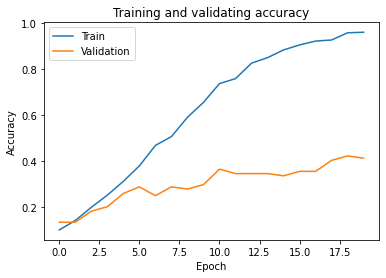

In [38]:
# Implement CNN
CNN = keras.Sequential()
CNN.add(layers.InputLayer((32, 32, 3)))
CNN.add(layers.experimental.preprocessing.Rescaling(1./255))
CNN.add(layers.Conv2D(16, (3, 3), activation="relu"))
CNN.add(layers.Conv2D(16, (3, 3), activation="relu"))
CNN.add(layers.MaxPool2D((2, 2)))
CNN.add(layers.Conv2D(24, (3, 3), activation="relu"))
CNN.add(layers.Conv2D(24, (3, 3), activation="relu"))
CNN.add(layers.MaxPool2D((2, 2)))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(10, activation="softmax"))

CNN.compile(optimizer='adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

# Train CNN
history = CNN.fit(train_data, validation_data=val_data, epochs=20)

# Plot
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

1.2. Modify the CNN (see assignment spec for details) and train it on the provided dataset.  Plot the training accuracy and validation accuracy over epochs.

Epoch 1/20
13/13 [==============================] - 1s 31ms/step - loss: 2.3186 - accuracy: 0.0986 - val_loss: 2.3139 - val_accuracy: 0.1250
Epoch 2/20
13/13 [==============================] - 0s 25ms/step - loss: 2.2940 - accuracy: 0.1322 - val_loss: 2.3084 - val_accuracy: 0.0962
Epoch 3/20
13/13 [==============================] - 0s 25ms/step - loss: 2.2863 - accuracy: 0.1346 - val_loss: 2.3074 - val_accuracy: 0.1538
Epoch 4/20
13/13 [==============================] - 0s 25ms/step - loss: 2.2742 - accuracy: 0.1611 - val_loss: 2.2865 - val_accuracy: 0.1827
Epoch 5/20
13/13 [==============================] - 0s 29ms/step - loss: 2.2326 - accuracy: 0.2067 - val_loss: 2.2450 - val_accuracy: 0.1635
Epoch 6/20
13/13 [==============================] - 0s 25ms/step - loss: 2.1685 - accuracy: 0.2091 - val_loss: 2.1195 - val_accuracy: 0.2404
Epoch 7/20
13/13 [==============================] - 0s 27ms/step - loss: 2.0826 - accuracy: 0.2644 - val_loss: 1.9985 - val_accuracy: 0.3077
Epoch 8/20
13

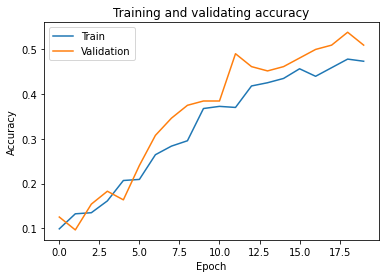

In [43]:
# Regularisation
regularisation_layer = layers.Dropout(0.2)

# Data augmentation
data_augmentation_layer = keras.Sequential()
data_augmentation_layer.add(layers.experimental.preprocessing.RandomFlip("horizontal"))
data_augmentation_layer.add(layers.experimental.preprocessing.RandomRotation(0.1))
data_augmentation_layer.add(layers.experimental.preprocessing.RandomZoom(0.1))

# Implement CNN_new
CNN_new = keras.Sequential()
CNN_new.add(layers.InputLayer((32, 32, 3)))
CNN_new.add(layers.experimental.preprocessing.Rescaling(1./255))
CNN_new.add(data_augmentation_layer)
CNN_new.add(layers.Conv2D(16, (3, 3), activation="relu"))
CNN_new.add(layers.Conv2D(16, (3, 3), activation="relu"))
CNN_new.add(layers.MaxPool2D((2, 2)))
CNN_new.add(layers.Conv2D(24, (3, 3), activation="relu"))
CNN_new.add(layers.Conv2D(24, (3, 3), activation="relu"))
CNN_new.add(layers.MaxPool2D((2, 2)))
CNN_new.add(regularisation_layer)
CNN_new.add(layers.Flatten())
CNN_new.add(layers.Dense(10, activation="softmax"))

CNN_new.compile(optimizer='adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

# Train CNN
history_new = CNN_new.fit(train_data, validation_data=val_data, epochs=20)

# Plot
plt.plot(history_new.history['accuracy'], label='Train')
plt.plot(history_new.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

### 2. Error anaylsis
Evaluate your CNN model from question 1.2 on the test dataset. See assignment spec for details.

Found 70 files belonging to 10 classes.
1/1 [==============================] - 0s 43ms/step - loss: 1.3466 - accuracy: 0.5000
Test results - Loss: 1.346632957458496 - Accuracy: 0.5
bridge


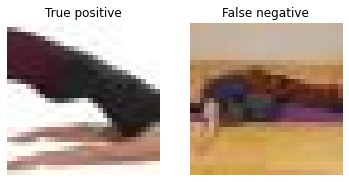

childs


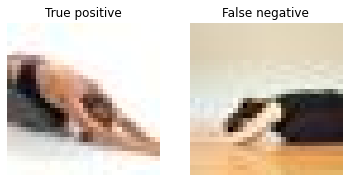

downwarddog


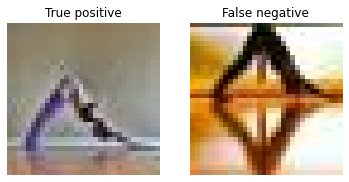

mountain


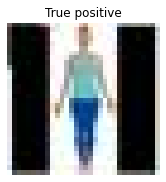

plank


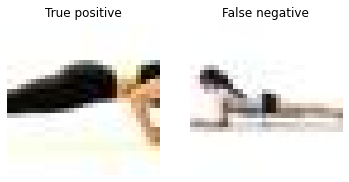

seatedforwardbend


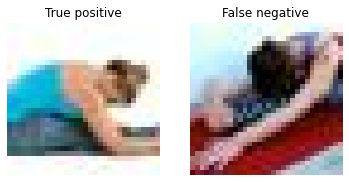

tree


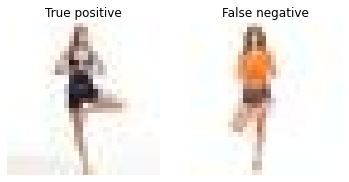

trianglepose


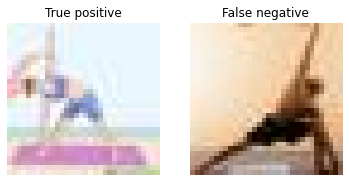

warrior1


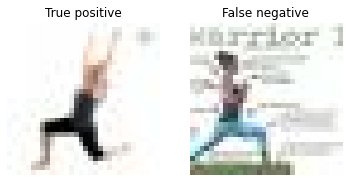

warrior2


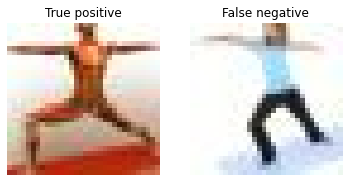

In [113]:
# Import test data
test_data = image_dataset_from_directory(
    data_dir+'/test',
    batch_size=70,
    label_mode="int",
    shuffle=False,
    class_names=class_names,
    image_size=(32, 32))

# Evaluate
results = CNN_new.evaluate(test_data)
print(f'Test results - Loss: {results[0]} - Accuracy: {results[1]}')

# Predict per class
scores = CNN_new.predict(test_data)
predictions = [class_names[np.argmax(x)] for x in scores]

# Extract true class labels
test_data_iter, test_labels = tuple(zip(*test_data))
test_data_iter = np.array(test_data_iter[0])
test_labels = np.array(test_labels[0])
truths = [class_names[x] for x in test_labels]

for i in range(len(class_names)):
    print(class_names[i])
    true_p = False
    false_n = False
    false_p = False
    true_n = False
    for j in range(70):
        if (truths[j] == class_names[i] and predictions[j] == truths[j] and true_p == False):
            ax = plt.subplot(1, 2, 1)
            plt.imshow(test_data_iter[j].astype("uint8"))
            plt.title("True positive")
            plt.axis("off")
            true_p = True
        if (truths[j] == class_names[i] and predictions[j] != truths[j] and false_n == False):
            ax = plt.subplot(1, 2, 2)
            plt.imshow(test_data_iter[j].astype("uint8"))
            plt.title("False negative")
            plt.axis("off")
            false_n = True
        if (truths[j] != class_names[i] and predictions[j] == class_names[j] and false_p == False):
            ax = plt.subplot(1, 2, 2)
            plt.imshow(test_data_iter[j].astype("uint8"))
            plt.title("False positive")
            plt.axis("off")
            false_p = True
        if (truths[j] != class_names[i] and predictions[j] == truths[j] and true_n == False):
            ax = plt.subplot(1, 2, 2)
            plt.imshow(test_data_iter[j].astype("uint8"))
            plt.title("True negative")
            plt.axis("off")
            true_n = True
    plt.show()
    

### 3. Visualisation
Visualise the feature space that your model uses to classify images. See assignment spec for details.